In [1]:
from random import randint

 

def two_ways_approach(train):
    starting_car_state: int = train[0]
    num_cars: int = 0 # Accumulate number of cars in the train

 
    # Initialize at 1 since we're not counting the first move between the starting car and the second

    num_moves: int = 1
    num_cars_from_start = 1

    # at the start move forwards

    moving_forwards = True
    while True:
        actual_position_in_train = num_cars_from_start % len(train)

        if num_cars_from_start == 0:
            # Once we get back to start start going in the other direction.
            moving_forwards = not moving_forwards


        if num_cars_from_start == 0 and train[actual_position_in_train] !=  starting_car_state:

            # If we've backtracked to the starting car and the light has changed then
            # the last light we changed must have been the starting car. We now know
            # how many cars there are!

            assert num_cars == len(train) # Assert that we were correct

            return num_moves

        # If we run into a car with the same light as the starting car
        elif num_cars_from_start != 0 and train[actual_position_in_train] == starting_car_state:
            # Change the light to the reverse of what it was
            # - i%len(train) so that we don't get index out of bounds
            train[num_cars_from_start % len(train)] = not train[actual_position_in_train]

            # Backtrack to the starting car
            num_moves += abs(num_cars_from_start)
            num_cars = abs(num_cars_from_start)
            num_cars_from_start = 0

        else:
            # If on the way around we encounter a car with a different light than the
            # starting car we know it isn't the starting car and can keep moving.
            if moving_forwards: num_cars_from_start += 1
            else: num_cars_from_start -= 1

            num_moves += 1

 

 

def one_way_approach(train):
    starting_car_state: int = train[0]
    num_cars: int = 0 # Accumulate number of cars in the train

    # Initialize at 1 since we're not counting the first move between the starting car and the second
    num_moves: int = 1
    num_cars_from_start = 1

    while True:
        actual_position_in_train = num_cars_from_start % len(train)

        if num_cars_from_start == 0 and train[actual_position_in_train] !=  starting_car_state:
            # If we've backtracked to the starting car and the light has changed then
            # the last light we changed must have been the starting car. We now know
            # how many cars there are!

            assert num_cars == len(train) # Assert that we were correct

            return num_moves

 

        # If we run into a car with the same light as the starting car
        elif num_cars_from_start != 0 and train[actual_position_in_train] == starting_car_state:
            # Change the light to the reverse of what it was
            # - i%len(train) so that we don't get index out of bounds
            train[num_cars_from_start % len(train)] = not train[actual_position_in_train]

            # Backtrack to the starting car
            num_moves += num_cars_from_start
            num_cars = num_cars_from_start
            num_cars_from_start = 0

        else:

            # If on the way around we encounter a car with a different light than the
            # starting car we know it isn't the starting car and can keep moving.
            num_cars_from_start += 1
            num_moves += 1


def generate_random_train(n):
    return [bool(randint(0,1)) for _ in range(n)]
 

def simulate(n, iterations, strategy):
    steps = []

    for _ in range(iterations):
        train = generate_random_train(n)
        steps.append(strategy(train))

    return sum(steps) / iterations
 

ITERATIONS = 10_000

In [2]:
from tqdm import tqdm

one_way_stats = {}

for i in tqdm(range(1, 101)):
    one_way_stats[i] = simulate(i, ITERATIONS, one_way_approach)

100%|██████████| 100/100 [03:50<00:00,  5.90s/it]


In [3]:
two_way_stats = {}

for i in tqdm(range(1, 101)):
    two_way_stats[i] = simulate(i, ITERATIONS, two_ways_approach)

100%|██████████| 100/100 [03:00<00:00,  4.98s/it]


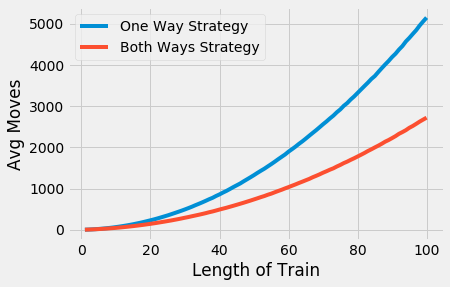

In [12]:
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.plot(one_way_stats.keys(), one_way_stats.values(), label = 'One Way Strategy')
plt.plot(two_way_stats.keys(), two_way_stats.values(), label = 'Both Ways Strategy')

plt.xlabel("Length of Train")
plt.ylabel("Avg Moves")

plt.legend()
plt.show()